In [59]:
import numpy as np 
import cv2 as cv 
import matplotlib.pyplot as plt 

In [60]:
img = cv.imread("DATA/pennies.jpg")

In [61]:
# To apply watershed algorithm we have to do 4 steps 

#  1- Blurring image using median blur
#  2- Converting to gray scale image 
#  3- Apply thresholding (BINARY INVERSE AND OTSU)
#  4- Noise Cancellation using MORPHOLOGICAL OPERATORS
#  5- Getting background(backgroud == dilations )
#  6- Distance transforms
#  7- Again apply thresholding (BINARY) to get foreground
#  8- subratact background with foregrounf 
#  9- grabbing markers 
#  10- applying watershed algorithm
#  11- Applying CONTOURS

In [62]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img, cmap='gray')


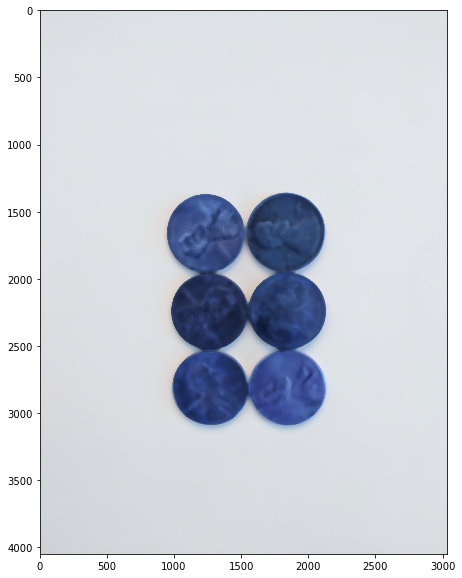

In [63]:
#  Applying median blur 

imgblur = cv.medianBlur(img,35)

display(imgblur)

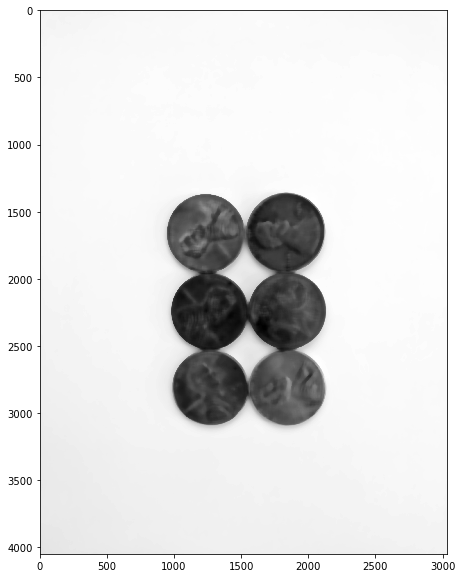

In [64]:
# Aplying to Gray Scale 

imggray = cv.cvtColor(imgblur, cv.COLOR_BGR2GRAY)
display(imggray)

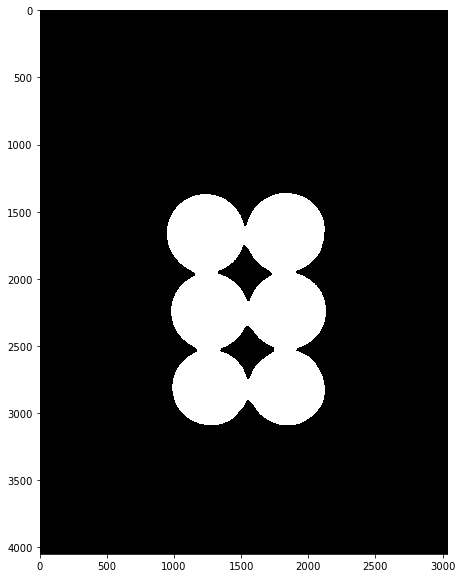

In [65]:
# Applying thresholding 

ret , th1 = cv.threshold(imggray, 0,255,cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

display(th1)

[[1 1 1]
 [1 1 1]
 [1 1 1]]


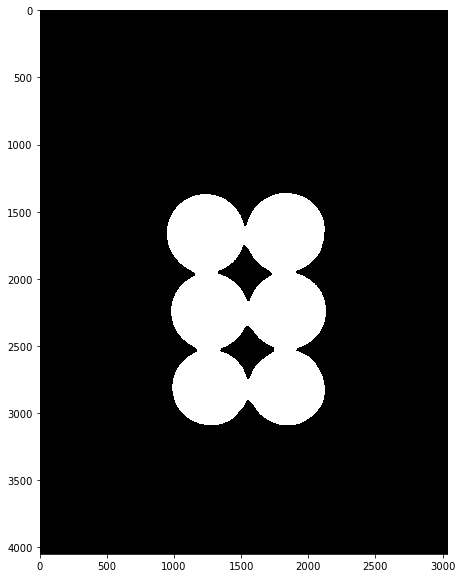

In [66]:
# NOISE REDUCTION
kernal = np.ones((3,3),dtype=np.uint8)
print(kernal)
imgnoisereduced = cv.morphologyEx(th1,cv.MORPH_OPEN,kernal,iterations = 2 )

display(imgnoisereduced)

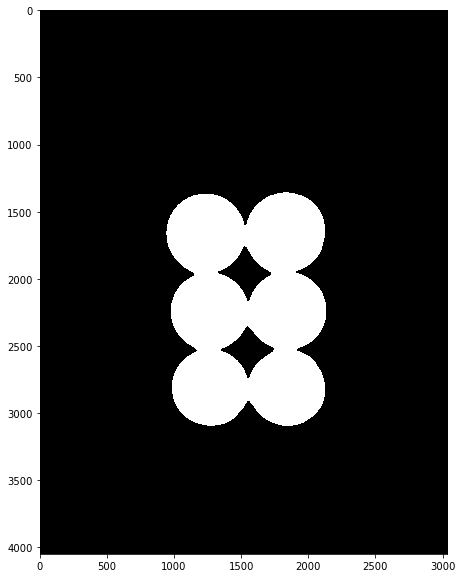

In [67]:
# finding background of the image 

background = cv.dilate(imgnoisereduced,kernal,iterations = 3)

display(background)

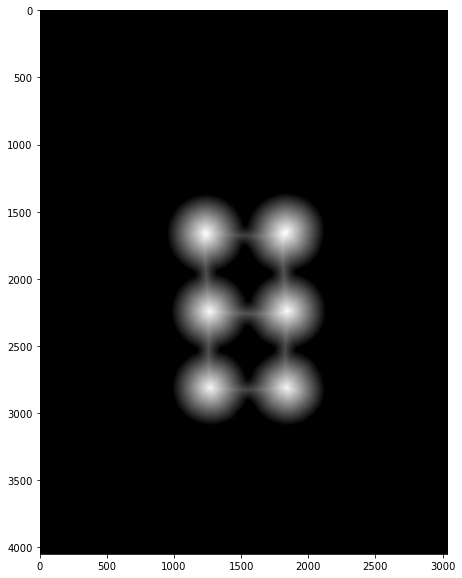

In [68]:
#  APPLYING DISTANCE TRANSFORM (SEE WIKIPEDIA)

distance_transform=cv.distanceTransform(imgnoisereduced,cv.DIST_L2,5)

display(distance_transform)

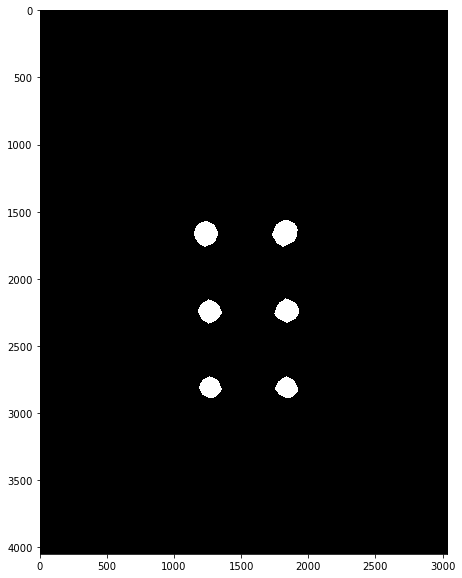

In [69]:
#  APPLY THRESHOLDING AGAIN to find the FOREGOUND OF THE IMAGE
# 0 == cv.THRESH_BINARY
# 70 percent of distance_transform's maximum value

ret , forground = cv.threshold(distance_transform,0.7*distance_transform.max(),255,0)

display(forground)

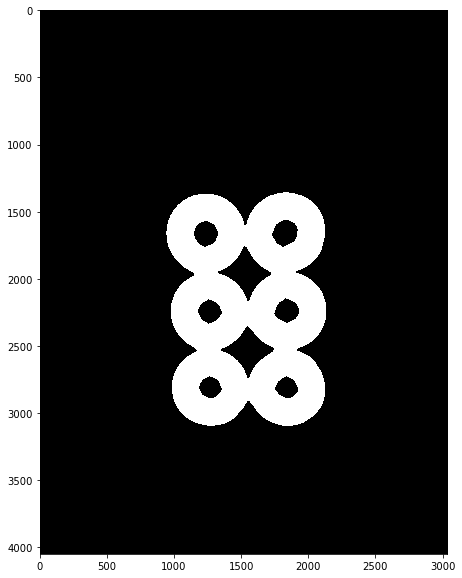

In [70]:
#  SUBTRACTING FOREGROUND WITH BACKGROUND

forground = np.uint8(forground)

unknown = cv.subtract(background,forground)

display(unknown)

In [71]:
ret , markers = cv.connectedComponents(forground, )

markers

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [72]:
markers = markers +1

In [73]:
markers

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)

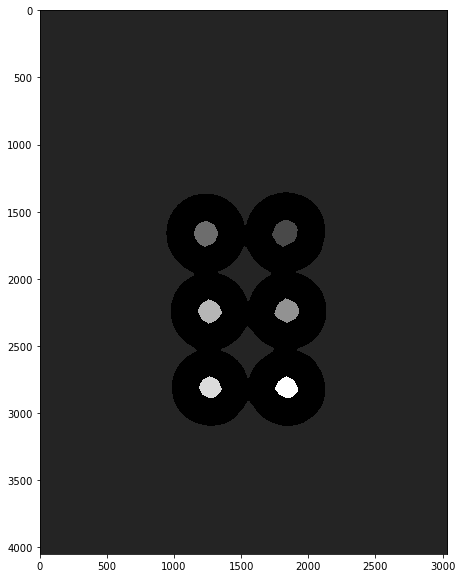

In [76]:
markers[unknown == 255] = 0

display(markers)

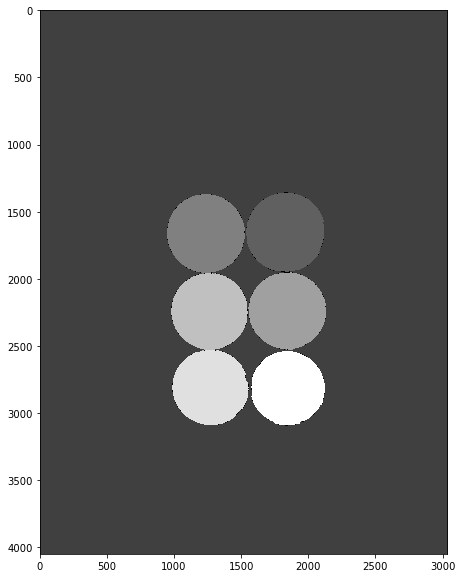

In [77]:
# Applying watershed algorithm 

watershedimg = cv.watershed(img,markers)

display(watershedimg)

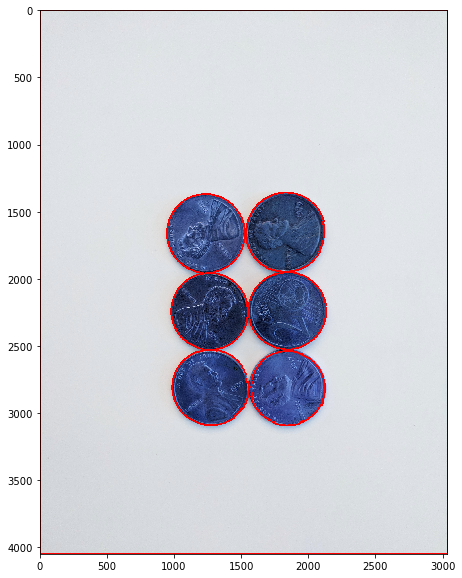

In [78]:
#  applying contours 


img2 , contours , hirerachy = cv.findContours(watershedimg.copy(),cv.RETR_CCOMP,cv.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hirerachy[0][i][3] == -1:
        cv.drawContours(img,contours,i,(255,0,0),10)
        

display(img)